In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
clients = pd.read_csv('clients.csv')

In [3]:
loans = pd.read_csv('loans.csv')

In [4]:
payments = pd.read_csv('payments.csv')

In [5]:
clients.head()

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


In [6]:
loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [7]:
payments.head()

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1


# Section 1 Ans

### Q1. Give the 5 client IDs with the highest mean payment amount

In [8]:
agg_loan_id = (payments.groupby(['loan_id'])[['payment_amount']].mean()).sort_values(by = 'payment_amount', ascending = False)

In [9]:
top5_loan_id = list(agg_loan_id.head().index)

In [10]:
top5_loan_id

[10953, 11914, 11604, 11539, 11827]

In [11]:
top5_client_id = loans[loans['loan_id'].isin(top5_loan_id)]['client_id'].values

In [12]:
top5_client_id

array([49545, 35214, 29841, 26695, 38537])

### Q1.Ans = [49545, 35214, 29841, 26695, 38537]

### Q2. How many unique loans have been given out to clients who joined prior to 2001?

In [13]:
clients['joined'] = clients['joined'].astype('datetime64[ns]')

In [14]:
clients['joined_year'] = clients['joined'].map(lambda x: x.strftime('%Y'))

In [15]:
clients = clients.sort_values(by = 'joined_year', ascending = True)

In [16]:
clients

,client_id,joined,income,credit_score,joined_year
24,26945,2000-11-26,214516,806,2000
18,39384,2000-06-18,191204,617,2000
11,42320,2000-04-27,229481,563,2000
22,41472,2001-11-06,152214,638,2001
3,46180,2001-11-06,43851,562,2001
20,38537,2002-10-21,127183,643,2002
15,32885,2002-05-13,58955,642,2002
13,29841,2002-08-17,38354,523,2002
0,46109,2002-04-16,172677,527,2002
8,35214,2003-08-08,95849,696,2003


#### There are only 3 clients prior to 2001. There clients ids are 26945,39384,42320

In [17]:
cli_id_2001 = [26945,39384,42320]

In [18]:
uni_cli_id = loans[loans['client_id'].isin(cli_id_2001)]

In [19]:
uni_cli_id

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
212,42320,home,8090,0,10156,2012-09-22,2015-04-17,3.18
213,42320,cash,13643,1,10728,2002-08-04,2004-05-10,1.30
214,42320,home,5784,1,10909,2005-06-22,2007-06-19,1.97
215,42320,cash,5974,0,11538,2006-01-19,2008-04-29,2.51
216,42320,credit,8517,1,10624,2000-12-02,2002-11-06,0.64
217,42320,cash,3241,0,11882,2001-12-13,2004-01-12,0.69
218,42320,other,8367,1,11812,2007-08-24,2009-06-16,6.74
219,42320,cash,7906,0,11733,2006-02-12,2007-09-17,3.68
220,42320,home,12090,1,11443,2010-03-07,2011-09-12,1.28
221,42320,other,9498,0,11770,2003-07-24,2006-01-23,2.26


In [20]:
uni_loans = uni_cli_id.loan_id.unique()

In [21]:
len(uni_loans)

49

### Q2.Ans 49 unique loans have been given out to clients who joined prior to 2001

### Q3. What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?

# Section 2 Ans

### Q1. Create a histogram of the payment amounts. Briefly describe the distribution.

Text(0.5, 1.0, 'Histogram of Payments')

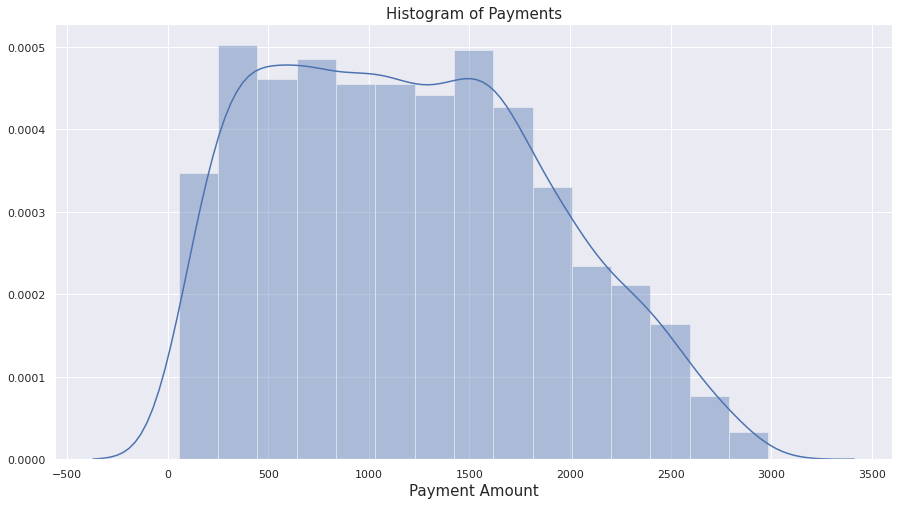

In [22]:
sns.set(rc={"figure.figsize": (15, 8)})
pay = payments['payment_amount']
ax = sns.distplot(pay,bins=15)
plt.xlabel("Payment Amount", fontsize= 15)
plt.title("Histogram of Payments", fontsize= 15)

In [23]:
 payments['payment_amount'].describe()

count    3456.000000
mean     1203.724537
std       684.506776
min        55.000000
25%       633.000000
50%      1153.000000
75%      1698.000000
max      2986.000000
Name: payment_amount, dtype: float64

In [24]:
 payments['payment_amount'].mode()

0    1229
dtype: int64

#### Here the distribution in not normal but positively skewed because it’s long tail is on the positive direction on the number line. Usally in a right skewed distribution, the mean is usually to the right of the median.

#### Frequency of the loan amount below 1500 is greater than that of the loan amount above 1500

#### KDE plot shows the probability density at different values in a continuous variable.

### Q2. Produce a line plot the cumulative sum of the number of clients by year.

In [25]:
clients

,client_id,joined,income,credit_score,joined_year
24,26945,2000-11-26,214516,806,2000
18,39384,2000-06-18,191204,617,2000
11,42320,2000-04-27,229481,563,2000
22,41472,2001-11-06,152214,638,2001
3,46180,2001-11-06,43851,562,2001
20,38537,2002-10-21,127183,643,2002
15,32885,2002-05-13,58955,642,2002
13,29841,2002-08-17,38354,523,2002
0,46109,2002-04-16,172677,527,2002
8,35214,2003-08-08,95849,696,2003


In [26]:
df = clients['joined_year'].value_counts().sort_index().rename_axis('Year').reset_index(name='Count')

In [27]:
df.set_index('Year', inplace=True)

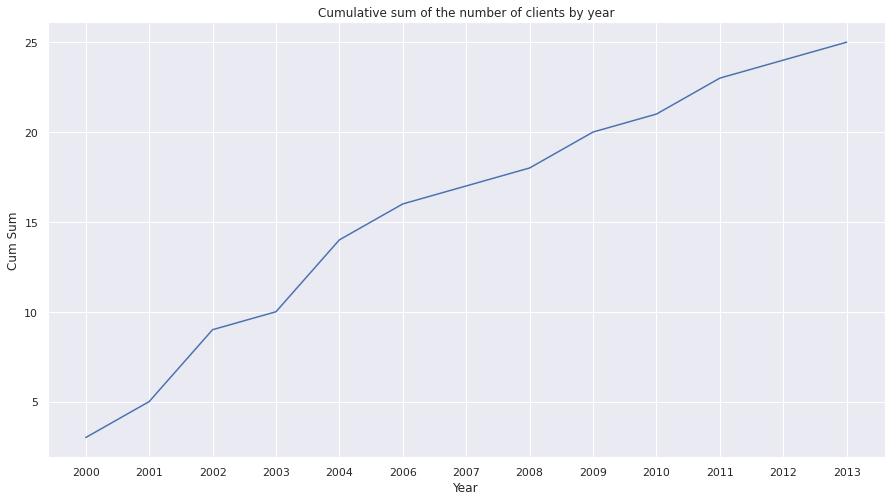

In [28]:
plt.xlabel('Year') 
plt.ylabel('Cum Sum') 
plt.title('Cumulative sum of the number of clients by year')
plt.plot(df.cumsum())
plt.show() 

### Q3. Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

# Section 3 - Modelling

In [29]:
data = pd.read_csv('test_diabetes.csv',sep=';')

In [30]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,Zero,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112,26.2,0.245,30.0,N
766,1.0,126.0,60.0,0.0,Zero,30.1,0.349,47.0,1


Data preprocessing

In [31]:
data.isnull().sum()

Pregnancies                 37
Glucose                     38
BloodPressure               34
SkinThickness               34
Insulin                     51
BMI                         35
DiabetesPedigreeFunction    40
Age                         51
Outcome                      0
dtype: int64

In [32]:
data = data.dropna()

Dataset contains missing values. If there exist missing values then it is better to either delete or replace them by mean/median/mode from the data. 

In [33]:
data['Outcome'] = data['Outcome'].replace({'N':0,'Y':1})
data['Insulin'] = data['Insulin'].replace({'Zero':0})

/home/prodigalson/.virtualenv/ts/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/prodigalson/.virtualenv/ts/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
6,3.0,78.0,50.0,32.0,88,31.0,0.248,26.0,1
8,2.0,197.0,70.0,45.0,543,30.5,0.158,53.0,1
...,...,...,...,...,...,...,...,...,...
760,2.0,88.0,58.0,26.0,16,28.4,0.766,22.0,0
761,9.0,170.0,74.0,31.0,0,44.0,0.403,43.0,1
764,2.0,122.0,70.0,27.0,0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112,26.2,0.245,30.0,0


In [35]:
col = list(data.columns)

convert column values to numeric

In [36]:
for co in col:
    data[co] = pd.to_numeric(data[co])

/home/prodigalson/.virtualenv/ts/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
data.shape

(503, 9)

Splitting the dataset into train and test set.

In [38]:
train = data[:400]
test = data[400:503]

Feature Scaling

In [39]:
y_train = np.asarray(train['Outcome'])
x_train = np.asarray(train.drop('Outcome',1))
y_test = np.asarray(test['Outcome'])
x_test = np.asarray(test.drop('Outcome',1))

Normalization

In [40]:
means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)
x_train = (x_train - means)/stds
x_test = (x_test - means)/stds

Model selection

In [41]:
def train(x_train,y_train):
    
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)


    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)

    rf= RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    rf.fit(x_train,y_train)

    #model accuracy
    print('Logistic accuracy:',log.score(x_train,y_train))
    print('Decision Tree accuracy:',tree.score(x_train,y_train))
    print('Random forest accuracy:',rf.score(x_train,y_train))
    return log,tree,rf

Training the model

In [42]:
train(x_train,y_train)

Logistic accuracy: 0.79
Decision Tree accuracy: 1.0
Random forest accuracy: 0.99


(LogisticRegression(random_state=0),
 DecisionTreeClassifier(criterion='entropy', random_state=0),
 RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0))

We should use Logistic regression model because random forest and decision trees models shows overfitting since any accuracy above 90 is considered to be overfitting.

In [43]:
def test(x_test,y_test):
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train)
    accuracy = log.score(x_test, y_test)
    return accuracy

Testing the model

In [44]:
test(x_test,y_test)

0.7281553398058253